### Student Information
Name: Andrew Cavicchi 柯德聿

Student ID: 110062424

GitHub ID: Drewcavicchi

Kaggle name: 喝咖灰

Kaggle private scoreboard snapshot:

![Snapshot](drew_score.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

In [2]:
### Begin Assignment Here

import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [ ]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [ ]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [ ]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


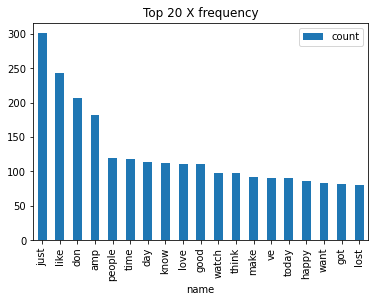

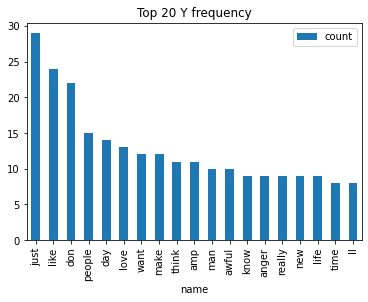

In [ ]:
# Answer here
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Removing stop words for more intersting results
# Vectorize
X_count_vect = CountVectorizer(stop_words = "english")
Y_count_vect = CountVectorizer(stop_words = "english")

X_fit = X_count_vect.fit_transform(train_df.text)
Y_fit = Y_count_vect.fit_transform(test_df.text)

# Grab names, grab counts, zip!
X_names = X_count_vect.get_feature_names_out()
X_counts = np.asarray(X_fit.sum(axis=0))
X_combo = zip(X_names,X_counts[0])
X_counts_df = pd.DataFrame(X_combo, columns = ['name', 'count'])


Y_names = Y_count_vect.get_feature_names()
Y_counts = np.asarray(Y_fit.sum(axis=0))
Y_combo = zip(Y_names, Y_counts[0])
Y_counts_df = pd.DataFrame(Y_combo, columns = ['name', 'count'])

# Top 20 freq
top_20_freq_X = X_counts_df.sort_values("count", ascending=False)[0:19]
top_20_freq_Y = Y_counts_df.sort_values("count", ascending=False)[0:19]

ax_X = top_20_freq_X.plot.bar(x='name', y='count', title="Top 20 X frequency")
ax_Y = top_20_freq_Y.plot.bar(x='name', y='count', title="Top 20 Y frequency")



---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [ ]:
#Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_1000 = TfidfVectorizer(max_features=1000)
tfidf_1000.fit_transform(train_df['text'])
tfidf_feature_names_1000 = tfidf_1000.get_feature_names_out()
tfidf_feature_names_1000[100:110]



array(['bitter', 'black', 'blacks', 'blame', 'blessed', 'blood', 'bloody',
       'blues', 'body', 'boiling'], dtype=object)

## Model

In [ ]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)



## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['sadness', 'fear', 'joy', 'fear', 'anger', 'joy', 'fear', 'anger',
       'anger', 'sadness'], dtype=object)

In [ ]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [ ]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.69      0.67        84
        fear       0.65      0.67      0.66       110
         joy       0.68      0.66      0.67        79
     sadness       0.66      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.65      0.66       347
weighted avg       0.66      0.66      0.66       347



In [ ]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[58 16  6  4]
 [14 74 10 12]
 [ 9 11 52  7]
 [ 9 13  8 44]]


In [ ]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

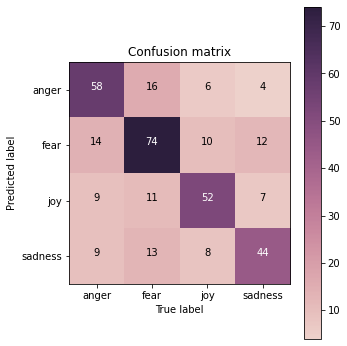

In [ ]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

## ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

# Answer here
Anger accuracy = 69% (84 guesses)
Fear accuracy = 67% (110 guesses)
Joy accuracy = 65% (79 guesses)
sadness = 59% (74 guesses)

The model was best at predicting anger with a 69% accuracy, and worst at predicting sadness with 59% accuracy. Across all labels, the model tended to guess fear as the second most likely label.


---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [ ]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

## predict!
y_train_pred_mb = clf.predict(X_train)
y_test_pred_mb = clf.predict(X_test)

acc_train_mb = accuracy_score(y_true=y_train, y_pred=y_train_pred_mb)
acc_test_mb = accuracy_score(y_true=y_test, y_pred=y_test_pred_mb)

print('training accuracy: {}'.format(round(acc_train_mb, 2)))
print('testing accuracy: {}'.format(round(acc_test_mb, 2)))

training accuracy: 0.79
testing accuracy: 0.7


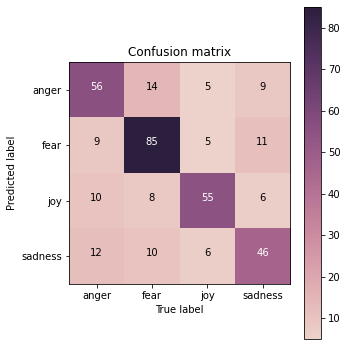

In [ ]:
cm_mb = confusion_matrix(y_true=y_test, y_pred=y_test_pred_mb)
plot_confusion_matrix(cm_mb, classes=my_tags, title='Confusion matrix')

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_test_pred_mb))

              precision    recall  f1-score   support

       anger       0.64      0.67      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.77      0.70      0.73        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

# Answer here

Performance for Naive Bayes was better than decision tree performance (70% accuracy on NB vs. 66% accuracy Decision Tree). In this particular case, it looks like the decision tree overfit the training data with 99% accuracy. Trying a more advanced version of decision tree (random forest) might have been able to achieve better results and avoid overfitting. Bayes was best at predicting joy, while decision tree was best at predicting fear. This may be due to the fact that naive bayes is not as good at dealing with correlated data, and there is a correlation between the three other categories.

In [ ]:
import tensorflow.keras as keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

Init Plugin
Init Graph Optimizer
Init Kernel
X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [ ]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1873     fear
760     anger
1579     fear
1447     fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [ ]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
__________________________________________________

2022-01-12 17:19:10.860327: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-12 17:19:10.860591: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
from tensorflow.keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
2022-01-12 17:20:00.300724: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


InvalidArgumentError: Cannot assign a device for operation model/dense/embedding_lookup_sparse/embedding_lookup: Could not satisfy explicit device specification '/job:localhost/replica:0/task:0/device:GPU:0' because no supported kernel for GPU devices is available.
Colocation Debug Info:
Colocation group had the following types and supported devices: 
Root Member(assigned_device_name_index_=2 requested_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' assigned_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' resource_device_name_='/job:localhost/replica:0/task:0/device:GPU:0' supported_device_types_=[CPU] possible_devices_=[]
AssignSubVariableOp: GPU CPU 
RealDiv: GPU CPU 
Sqrt: GPU CPU 
AssignVariableOp: GPU CPU 
UnsortedSegmentSum: GPU CPU 
Identity: GPU CPU 
StridedSlice: GPU CPU 
Const: GPU CPU 
NoOp: GPU CPU 
Mul: GPU CPU 
Shape: GPU CPU 
_Arg: GPU CPU 
ResourceScatterAdd: GPU CPU 
Unique: CPU 
ReadVariableOp: GPU CPU 
AddV2: GPU CPU 
ResourceGather: GPU CPU 

Colocation members, user-requested devices, and framework assigned devices, if any:
  model_dense_embedding_lookup_sparse_embedding_lookup_573 (_Arg)  framework assigned device=/job:localhost/replica:0/task:0/device:GPU:0
  adam_adam_update_readvariableop_resource (_Arg)  framework assigned device=/job:localhost/replica:0/task:0/device:GPU:0
  adam_adam_update_readvariableop_2_resource (_Arg)  framework assigned device=/job:localhost/replica:0/task:0/device:GPU:0
  model/dense/embedding_lookup_sparse/embedding_lookup (ResourceGather) /job:localhost/replica:0/task:0/device:GPU:0
  model/dense/embedding_lookup_sparse/embedding_lookup/Identity (Identity) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/Unique (Unique) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/Shape (Shape) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/strided_slice/stack (Const) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/strided_slice/stack_1 (Const) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/strided_slice/stack_2 (Const) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/strided_slice (StridedSlice) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/UnsortedSegmentSum (UnsortedSegmentSum) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/mul (Mul) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/ReadVariableOp (ReadVariableOp) 
  Adam/Adam/update/mul_1 (Mul) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/AssignVariableOp (AssignVariableOp) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/ResourceScatterAdd (ResourceScatterAdd) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/ReadVariableOp_1 (ReadVariableOp) 
  Adam/Adam/update/mul_2 (Mul) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/mul_3 (Mul) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/ReadVariableOp_2 (ReadVariableOp) 
  Adam/Adam/update/mul_4 (Mul) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/AssignVariableOp_1 (AssignVariableOp) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/ResourceScatterAdd_1 (ResourceScatterAdd) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/ReadVariableOp_3 (ReadVariableOp) 
  Adam/Adam/update/Sqrt (Sqrt) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/mul_5 (Mul) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/add (AddV2) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/truediv (RealDiv) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/AssignSubVariableOp (AssignSubVariableOp) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/group_deps/NoOp (NoOp) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/group_deps/NoOp_1 (NoOp) /job:localhost/replica:0/task:0/device:GPU:0
  Adam/Adam/update/group_deps (NoOp) /job:localhost/replica:0/task:0/device:GPU:0

Op: ResourceGather
Node attrs: batch_dims=0, Tindices=DT_INT64, validate_indices=true, _class=["loc:@model/dense/embedding_lookup_sparse/embedding_lookup/573"], dtype=DT_FLOAT
Registered kernels:
  device='GPU'; dtype in [DT_INT64]; Tindices in [DT_INT32]
  device='GPU'; dtype in [DT_INT64]; Tindices in [DT_INT64]
  device='GPU'; dtype in [DT_FLOAT]; Tindices in [DT_INT32]
  device='GPU'; dtype in [DT_FLOAT]; Tindices in [DT_INT64]
  device='CPU'; dtype in [DT_UINT64]; Tindices in [DT_INT32]
  device='CPU'; dtype in [DT_UINT64]; Tindices in [DT_INT64]
  device='CPU'; dtype in [DT_INT64]; Tindices in [DT_INT32]
  device='CPU'; dtype in [DT_INT64]; Tindices in [DT_INT64]
  device='CPU'; dtype in [DT_UINT32]; Tindices in [DT_INT32]
  device='CPU'; dtype in [DT_UINT32]; Tindices in [DT_INT64]
  device='CPU'; dtype in [DT_UINT16]; Tindices in [DT_INT32]
  device='CPU'; dtype in [DT_UINT16]; Tindices in [DT_INT64]
  device='CPU'; dtype in [DT_INT16]; Tindices in [DT_INT32]
  device='CPU'; dtype in [DT_INT16]; Tindices in [DT_INT64]
  device='CPU'; dtype in [DT_UINT8]; Tindices in [DT_INT32]
  device='CPU'; dtype in [DT_UINT8]; Tindices in [DT_INT64]
  device='CPU'; dtype in [DT_INT8]; Tindices in [DT_INT32]
  device='CPU'; dtype in [DT_INT8]; Tindices in [DT_INT64]
  device='CPU'; dtype in [DT_INT32]; Tindices in [DT_INT32]
  device='CPU'; dtype in [DT_INT32]; Tindices in [DT_INT64]
  device='CPU'; dtype in [DT_HALF]; Tindices in [DT_INT32]
  device='CPU'; dtype in [DT_HALF]; Tindices in [DT_INT64]
  device='CPU'; dtype in [DT_BFLOAT16]; Tindices in [DT_INT32]
  device='CPU'; dtype in [DT_BFLOAT16]; Tindices in [DT_INT64]
  device='CPU'; dtype in [DT_FLOAT]; Tindices in [DT_INT32]
  device='CPU'; dtype in [DT_FLOAT]; Tindices in [DT_INT64]
  device='CPU'; dtype in [DT_DOUBLE]; Tindices in [DT_INT32]
  device='CPU'; dtype in [DT_DOUBLE]; Tindices in [DT_INT64]
  device='CPU'; dtype in [DT_COMPLEX64]; Tindices in [DT_INT32]
  device='CPU'; dtype in [DT_COMPLEX64]; Tindices in [DT_INT64]
  device='CPU'; dtype in [DT_COMPLEX128]; Tindices in [DT_INT32]
  device='CPU'; dtype in [DT_COMPLEX128]; Tindices in [DT_INT64]
  device='CPU'; dtype in [DT_BOOL]; Tindices in [DT_INT32]
  device='CPU'; dtype in [DT_BOOL]; Tindices in [DT_INT64]
  device='CPU'; dtype in [DT_STRING]; Tindices in [DT_INT32]
  device='CPU'; dtype in [DT_STRING]; Tindices in [DT_INT64]
  device='CPU'; dtype in [DT_RESOURCE]; Tindices in [DT_INT32]
  device='CPU'; dtype in [DT_RESOURCE]; Tindices in [DT_INT64]
  device='CPU'; dtype in [DT_VARIANT]; Tindices in [DT_INT32]
  device='CPU'; dtype in [DT_VARIANT]; Tindices in [DT_INT64]
  device='CPU'; dtype in [DT_QINT8]; Tindices in [DT_INT32]
  device='CPU'; dtype in [DT_QINT8]; Tindices in [DT_INT64]
  device='CPU'; dtype in [DT_QUINT8]; Tindices in [DT_INT32]
  device='CPU'; dtype in [DT_QUINT8]; Tindices in [DT_INT64]
  device='CPU'; dtype in [DT_QINT32]; Tindices in [DT_INT32]
  device='CPU'; dtype in [DT_QINT32]; Tindices in [DT_INT64]

	 [[{{node model/dense/embedding_lookup_sparse/embedding_lookup}}]] [Op:__inference_train_function_852]

In [ ]:
from sklearn.metrics import accuracy_score
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]


print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

NameError: name 'pred_result' is not defined

In [ ]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

EmptyDataError: No columns to parse from file

In [ ]:
# Answer here
acc_plot = training_log.plot.line(x="epoch", y=['accuracy', "val_accuracy"])
loss_plot = training_log.plot.line(x="epoch", y=['loss', "val_loss"])

KeyError: 'epoch'

## Word2Vec

In [36]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

ModuleNotFoundError: No module named 'gensim'